# IMPORT SESSION

Import Libraries

In [1]:
!pip install catboost --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold,learning_curve
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier, VotingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from mlxtend.classifier import StackingCVClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report
from sklearn.calibration import CalibratedClassifierCV

Read dataset

In [3]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [4]:
df1.shape

(891, 12)

In [5]:
df2.shape

(418, 11)

In [6]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
df = pd.concat([df1, df2], ignore_index=True)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# DATA EXPLORATION

In [9]:
df.shape

(1309, 12)

In [10]:
df.size

15708

In [11]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [12]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: Survived, dtype: int64

In [14]:
df.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
C         1.0          93
          0.0          75
Q         0.0          47
          1.0          30
S         0.0         427
          1.0         217
Name: Survived, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


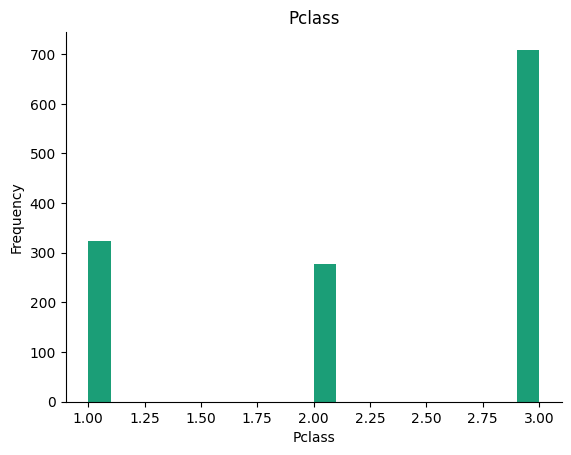

In [17]:
df['Pclass'].plot(kind='hist',bins=20,title='Pclass',color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
df.groupby('Sex').size()

Sex
female    466
male      843
dtype: int64

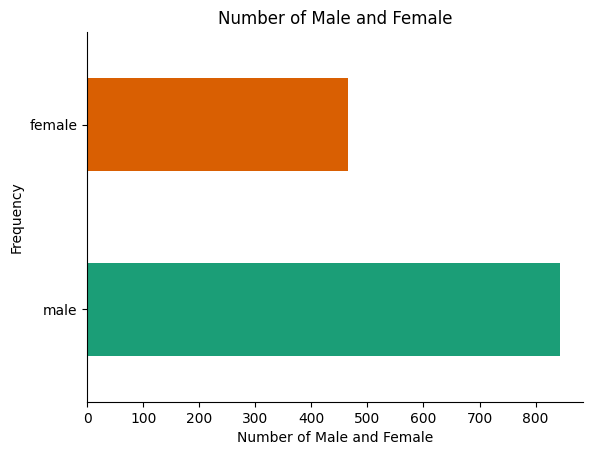

In [19]:
df['Sex'].value_counts().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'),title='Number of Male and Female')
plt.xlabel('Number of Male and Female')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
df.groupby('Parch').size()

Parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
dtype: int64

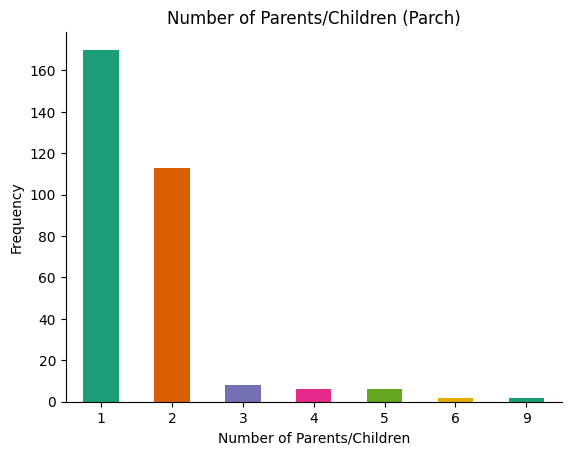

In [21]:
df.groupby('Parch').size()[1:].plot(kind='bar',color=sns.palettes.mpl_palette('Dark2'),title='Number of Parents/Children (Parch)')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
df.groupby('SibSp').size()

SibSp
0    891
1    319
2     42
3     20
4     22
5      6
8      9
dtype: int64

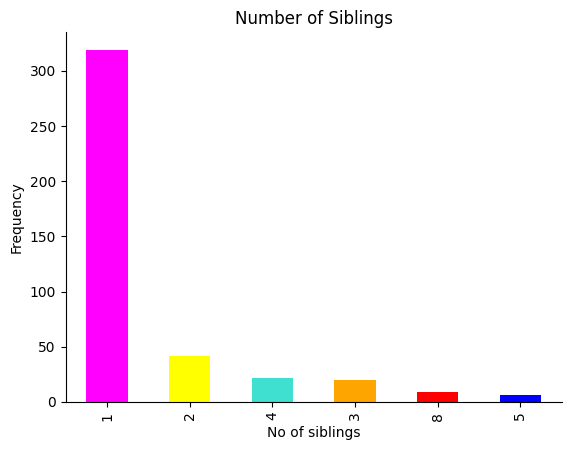

In [23]:
df['SibSp'].value_counts()[1:].plot(kind='bar',title="Number of Siblings",color=['#ff00ff','yellow','#40e0d0','orange','red','blue'])
plt.xlabel("No of siblings")
plt.ylabel("Frequency")
plt.gca().spines[['top','right']].set_visible(False)

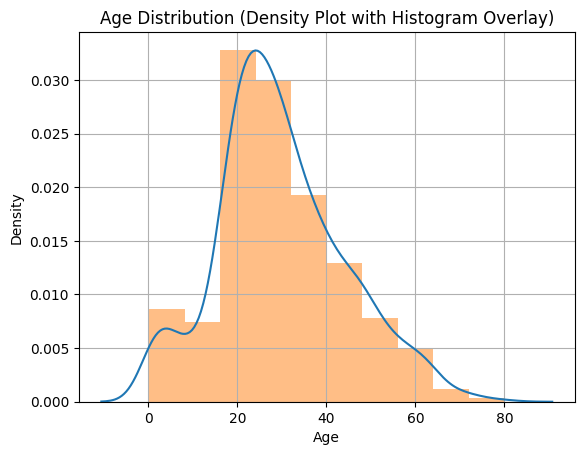

In [24]:
sns.kdeplot(df.Age,  legend=True)
plt.hist(df.Age, density=True, alpha=0.5, bins=10)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution (Density Plot with Histogram Overlay)')
plt.grid(True)
plt.show()

In [25]:
df.groupby('Pclass')['Survived'].size()

Pclass
1    323
2    277
3    709
Name: Survived, dtype: int64

In [26]:
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1.0         136
        0.0          80
2       0.0          97
        1.0          87
3       0.0         372
        1.0         119
Name: Survived, dtype: int64

In [27]:
Pclass_survival_counts = df.groupby('Pclass')['Survived'].value_counts().unstack()

In [28]:
Pclass_survival_counts

Survived,0.0,1.0
Pclass,,
1,80,136
2,97,87
3,372,119


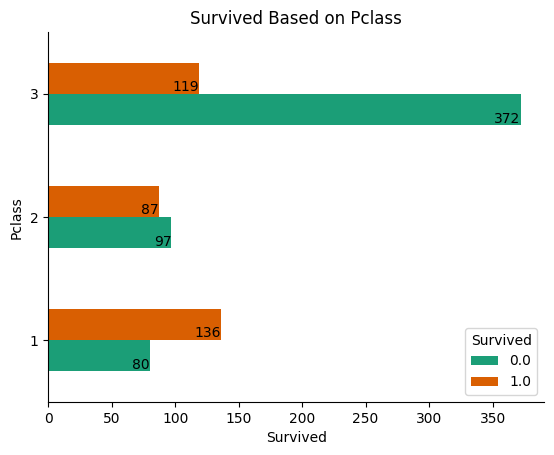

In [29]:
Pclass_survival_counts.plot(kind='barh',color=sns.mpl_palette('Dark2'),title="Survived Based on Pclass")
plt.gca().spines[['top','right']].set_visible(False)
plt.xlabel('Survived')
plt.ylabel('Pclass')
for i, (index, row) in enumerate(Pclass_survival_counts.iterrows()):
    plt.text(row.iloc[1], i+0.06, int(row.iloc[1]), va='center',ha='right')
    plt.text(row.iloc[0], i-0.2, int(row.iloc[0]), va='center',ha='right')

In [30]:
Sex_survival_counts = df.groupby('Sex')['Survived'].value_counts().unstack()

In [31]:
Sex_survival_counts

Survived,0.0,1.0
Sex,,
female,81,233
male,468,109


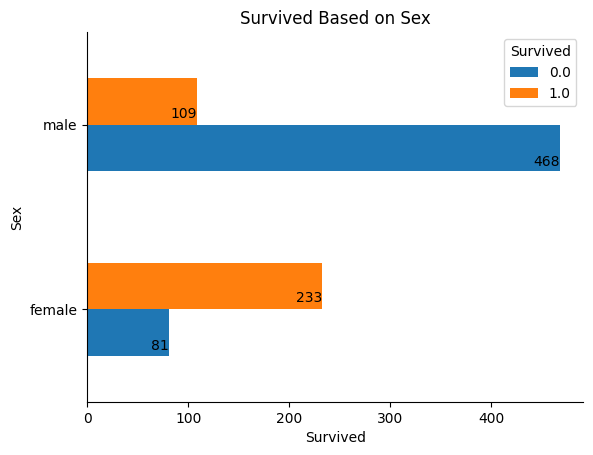

In [32]:
Sex_survival_counts.plot(kind='barh',title="Survived Based on Sex")
plt.gca().spines[['top','right']].set_visible(False)
plt.xlabel("Survived")
for i, (index,row) in enumerate(Sex_survival_counts.iterrows()):
  plt.text(row.iloc[0],i-0.2,row.iloc[0],va='center',ha='right')
  plt.text(row.iloc[1],i+0.06,row.iloc[1],va='center',ha='right')

In [33]:
Embarked_survival_count = df.groupby('Embarked')['Survived'].value_counts().unstack()

In [34]:
Embarked_survival_count

Survived,0.0,1.0
Embarked,,
C,75,93
Q,47,30
S,427,217


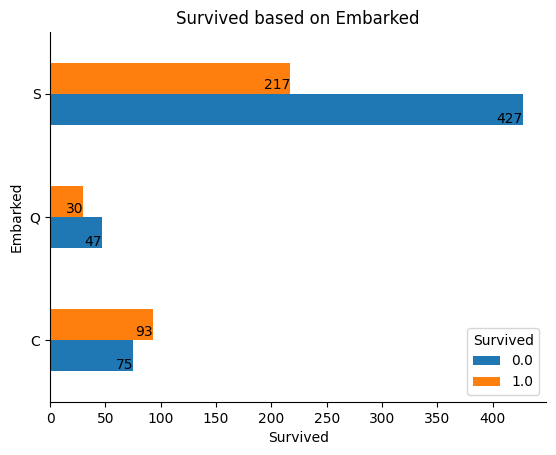

In [35]:
Embarked_survival_count.plot(kind='barh',title="Survived based on Embarked")
plt.xlabel("Survived")
plt.gca().spines[['top','right']].set_visible(False)
for i, (index,row) in enumerate(Embarked_survival_count.iterrows()):
  plt.text(row.iloc[0],i-0.2,row.iloc[0],va='center',ha='right')
  plt.text(row.iloc[1],i+0.07,row.iloc[1],va='center',ha='right')

# DATA PREPROCESSING

  Categorize columns of a DF into categorical, numerical, and high cardinality categorical.


In [49]:
def categorize_columns(dataframe, cat_th=10, car_th=20):

    cat_cols = dataframe.select_dtypes(include=['object']).columns.tolist()
    num_cols = dataframe.select_dtypes(exclude=['object']).columns.tolist()

    num_but_cat = [col for col in num_cols if dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in cat_cols if dataframe[col].nunique() > car_th]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car

In [50]:
def preprocess_data(df):
    # Fill missing values
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
    df["Cabin"] = df["Cabin"].fillna("X")

    df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.').fillna('Unknown')

    age_mean_by_group = df.groupby(['Title', 'Sex', 'Pclass'])['Age'].transform("mean")
    df['Age'] = df['Age'].fillna(age_mean_by_group)

    age_bins = [df["Age"].min(), 5, 13, 18, 30, 40, 56, df['Age'].max() + 1]
    age_labels = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior']
    df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    df["Family_size"] = df["Parch"] + df["SibSp"] + 1
    family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small',
                  5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
    df['Family_Group'] = df['Family_size'].map(family_map)

    df["Cabin_Letter"] = df["Cabin"].str[0]

    df["Fare_Category"] = pd.qcut(df['Fare'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

    df["Last_Name"] = df["Name"].str.split(",").str[0]

    df["Ticket_Survival_Rate"] = 0.5
    ticket_groups = df.groupby("Ticket")

    for _, group in ticket_groups:
      if len(group) > 1:
            survived_max = group["Survived"].max()
            survived_min = group["Survived"].min()
            group_ids = group["PassengerId"]

            if survived_max == 1:
                df.loc[df["PassengerId"].isin(group_ids), "Ticket_Survival_Rate"] = 1
            elif survived_min:
                df.loc[df["PassengerId"].isin(group_ids), "Ticket_Survival_Rate"] = 0

    df["Ticket_Survival_Rate"] = df["Ticket_Survival_Rate"].astype(str)

    df['AgeClass'] = df['Age'] * df['Pclass']
    df['FarePerPerson'] = df['Fare'] / df['Family_size']
    df['ChildWithParents'] = np.where((df['Age'] < 18) & (df['Parch'] > 0), 1, 0)
    df['Ticket_Frequency'] = df.groupby('Ticket')['Ticket'].transform('count')
    df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'U')

    df_final = df.drop(columns=["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Last_Name"])

    return df_final

In [51]:
# Preprocess data
df_final = preprocess_data(df)

# Separate categorical and numerical columns
categorical_cols, number_cols, _ = categorize_columns(df_final)

In [52]:
label_encoder = LabelEncoder()
df_final['Pclass_Encoded'] = label_encoder.fit_transform(df_final['Pclass'])
df_final['Fare_Category_Encoded'] = label_encoder.fit_transform(df_final['Fare_Category'])
df_final.drop("Pclass", axis=1, inplace=True)
df_final.drop("Fare_Category", axis=1, inplace=True)

In [53]:
categorical_cols.remove("Pclass")
categorical_cols.remove("Fare_Category")
categorical_cols.remove("Survived")

In [54]:
categorical_cols_encoded = pd.get_dummies(df_final[categorical_cols])
df_encoded = pd.concat([df_final, categorical_cols_encoded], axis=1)
df_encoded.drop(categorical_cols, axis=1, inplace=True)
df_final_encoded = df_encoded.copy()

In [55]:
df_final_encoded

,Survived,Age,Fare,AgeClass,FarePerPerson,Pclass_Encoded,Fare_Category_Encoded,Sex_female,Sex_male,Embarked_C,...,Deck_G,Deck_T,Deck_X,Age_Group_Baby,Age_Group_Child,Age_Group_Teenager,Age_Group_Young Adult,Age_Group_Adult,Age_Group_Middle-Aged,Age_Group_Senior
0,0.0,22.00000,7.2500,66.000000,3.625000,2,4,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1.0,38.00000,71.2833,38.000000,35.641650,0,3,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1.0,26.00000,7.9250,78.000000,7.925000,2,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1.0,35.00000,53.1000,35.000000,26.550000,0,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,35.00000,8.0500,105.000000,8.050000,2,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,28.31891,8.0500,84.956731,8.050000,2,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1305,NaN,39.00000,108.9000,39.000000,108.900000,0,3,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1306,NaN,38.50000,7.2500,115.500000,7.250000,2,4,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1307,NaN,28.31891,8.0500,84.956731,8.050000,2,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [71]:
# correlation_mask = df_final_encoded.corr()['Survived'] > 0.1
# selected_features = df_final_encoded.columns[correlation_mask].tolist()

In [74]:
# Split data into train and test
train_df = df_encoded.iloc[:891, :]
test_df = df_encoded.iloc[891:, :]
test = df.iloc[891:, :]

X_train = train_df
X_train = train_df
X_train = X_train.drop('Survived',axis=1)

Y_train = train_df["Survived"]
X_test = test_df
X_test = X_test.drop('Survived',axis=1)


In [ ]:
selector1 = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=2,random_state=44),max_features=10).

In [83]:

clf = XGBClassifier(n_estimators=100, learning_rate=0.02, max_depth=6,
                          colsample_bytree=0.75, min_child_weight=0.01,
                          subsample=0.6, random_state=44)

selector = SelectFromModel(clf).fit(X_train, Y_train)
X_train_transformed = selector.transform(X_train)
X_test_transformed = selector.transform(X_test)
print("Number of original features: ", X_train.shape[1])
print("Number of selected features: ", X_train_transformed.shape[1])

# Initialize PolynomialFeatures object
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_transformed)
X_test_poly = poly.fit_transform(X_test_transformed)


Number of original features:  67
Number of selected features:  11


In [84]:
X_poly.shape

(891, 78)

In [85]:
X_test_poly.shape

(418, 78)

In [88]:
Y_train.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [89]:
# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.02, max_depth=6,
                          colsample_bytree=0.75, min_child_weight=0.01,
                          subsample=0.6, random_state=44)
xgb_cv = cross_val_score(xgb_model, X_poly, Y_train, cv=10, scoring="accuracy").mean()
print(f"Cross-validation accuracy: {xgb_cv:.4f}")

# Fit model and make predictions
xgb_model.fit(X_poly, Y_train)
predictions = xgb_model.predict(X_test_poly)
output = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": predictions.astype(int)})
output.to_csv('Submission3.csv', index=False)

Cross-validation accuracy: 0.8574


# ML

In [94]:
x_train, x_val, y_train, y_val = train_test_split(X_poly, Y_train, random_state=44, test_size=0.20)

In [95]:
gb_model = GradientBoostingClassifier(random_state=42)
ridge_model = RidgeClassifier(alpha=0.5)
logestic_model = LogisticRegression(max_iter=2000)
cat_model = CatBoostClassifier(iterations=100,verbose=False)
rf_model = RandomForestClassifier(n_estimators=100,random_state=44)
knn_model = KNeighborsClassifier()
svc_model = SVC(probability=True, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [96]:
models = {
    "Gradient Booster": gb_model,
    "Ridge Model"   : ridge_model,
    "Logestic Regerssion" :logestic_model,
    "CatBooster":cat_model,
    "RandomForest":rf_model,
    "K-nearest neighbors" : knn_model,
    "SVC": svc_model,
    "GradientBoost"  : xgb_model
}

In [97]:
for (name,model) in models.items():
  model.fit(x_train, y_train)
  pred = model.predict(x_val)
  print(f"Accuracy score for {name} is {accuracy_score(pred,y_val)}")
  model_cv = cross_val_score(model,X_poly , Y_train, cv=10, scoring="accuracy").mean()
  print(f"Cross-validation accuracy: {model_cv:.4f}")

Accuracy score for Gradient Booster is 0.8156424581005587
Cross-validation accuracy: 0.8563
Accuracy score for Ridge Model is 0.8156424581005587
Cross-validation accuracy: 0.8619
Accuracy score for Logestic Regerssion is 0.8156424581005587
Cross-validation accuracy: 0.8597
Accuracy score for CatBooster is 0.8044692737430168
Cross-validation accuracy: 0.8563
Accuracy score for RandomForest is 0.8212290502793296
Cross-validation accuracy: 0.8563
Accuracy score for K-nearest neighbors is 0.7988826815642458
Cross-validation accuracy: 0.8597
Accuracy score for SVC is 0.8044692737430168
Cross-validation accuracy: 0.8563
Accuracy score for GradientBoost is 0.8212290502793296
Cross-validation accuracy: 0.8541


In [98]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=6,
                          colsample_bytree=0.75, min_child_weight=0.01,
                          subsample=0.6, random_state=0)
xgb_cv = cross_val_score(xgb_model, X_poly, Y_train, cv=10, scoring="accuracy").mean()
print(f"Cross-validation accuracy: {xgb_cv:.4f}")

# Fit model and make predictions
xgb_model.fit(x_train, y_train)
predictions = xgb_model.predict(x_val)
print(f"Accuracy score for {name} is {accuracy_score(predictions,y_val)}")

Cross-validation accuracy: 0.8552
Accuracy score for GradientBoost is 0.7988826815642458


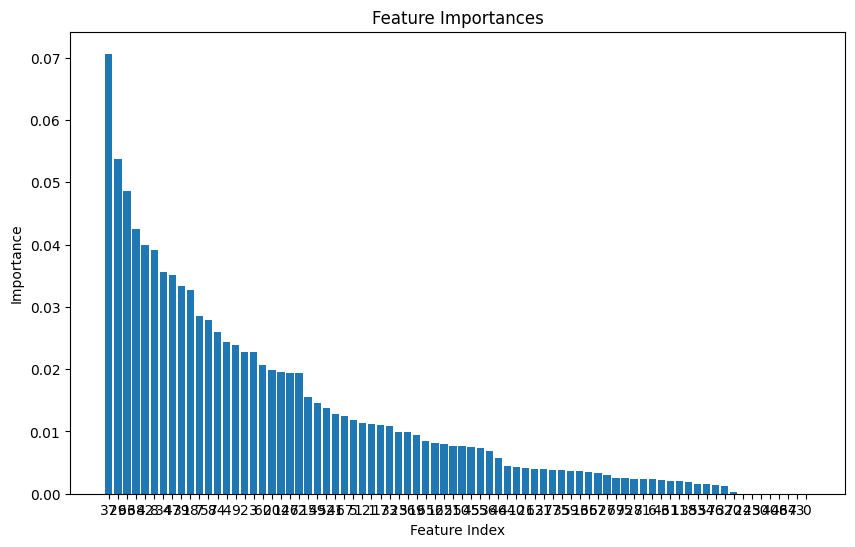

In [99]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


In [100]:
xgb_model = XGBClassifier(n_estimators=100,
                          learning_rate= 0.01,
                          max_depth=6,
                          colsample_bytree= 0.75,
                          min_child_weight= 0.01,
                          subsample= 0.6,
                          random_state=0)
xgb_model.fit(x_train, y_train)
pred = xgb_model.predict(x_val)
print(f"Accuracy score for {name} is {accuracy_score(pred,y_val)}")
model_cv = cross_val_score(xgb_model, X_poly, Y_train, cv=10, scoring="accuracy").mean()
print(f"Cross-validation accuracy: {model_cv:.4f}")


Accuracy score for GradientBoost is 0.7988826815642458
Cross-validation accuracy: 0.8552


In [101]:
rf_model = RandomForestClassifier(criterion= 'entropy', max_depth=8, min_samples_leaf = 2, min_samples_split=  2, n_estimators=  100)
rf_model.fit(x_train, y_train)
pred = rf_model.predict(x_val)
print(f"Accuracy score for {name} is {accuracy_score(pred,y_val)}")
model_cv = cross_val_score(rf_model, X_poly, Y_train, cv=10, scoring="accuracy").mean()
print(f"Cross-validation accuracy: {model_cv:.4f}")

Accuracy score for GradientBoost is 0.8212290502793296
Cross-validation accuracy: 0.8552


# Hyperparameter Tuning

Hyperparameter Tuning

In [ ]:
param_distributions_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_distributions_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}
param_distributions = [param_distributions_rf,param_distributions_xgb]
models = [RandomForestClassifier(random_state=44),XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=44)]

for i in range(2):
  random_search = RandomizedSearchCV(models[i], param_distributions[i], n_iter=20, cv=5, scoring='accuracy', random_state=42)
  random_search.fit(x_train, y_train)
  print("Best Hyperparameters:", random_search.best_params_)
  print("Best accuracy found: ", random_search.best_score_)

  best_model = random_search.best_estimator_
  predictions = best_model.predict(x_val)
  accuracy = accuracy_score(y_val, predictions)
  print("Accuracy of model  after hyperparameter tuning:", accuracy)

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
Best accuracy found:  0.851974025974026
Accuracy of model  after hyperparameter tuning: 0.8136363636363636
Best Hyperparameters: {'n_estimators': 50, 'max_depth': None, 'learning_rate': 0.1}
Best accuracy found:  0.8497142857142859
Accuracy of model  after hyperparameter tuning: 0.8045454545454546


In [ ]:
param_grid_catboost = {
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [100, 200, 300]
}
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

param_distributions = [param_grid_catboost,param_grid_svc]
models = [cat_model,svc_model]
for i in range(2):
  grid_search = GridSearchCV(estimator=models[i], param_grid=param_distributions[i], cv=5, scoring='accuracy')
  grid_search.fit(x_train, y_train)
  print("Best parameters found: ", grid_search.best_params_)
  print("Best accuracy found: ", grid_search.best_score_)

  best_model = grid_search.best_estimator_
  predictions = best_model.predict(x_val)
  accuracy = accuracy_score(y_val, predictions)
  print("Accuracy of model after hyperparameter tuning:", accuracy)


Best parameters found:  {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.5}
Best accuracy found:  0.856512987012987
Accuracy of model after hyperparameter tuning: 0.8181818181818182
Best parameters found:  {'C': 10, 'kernel': 'rbf'}
Best accuracy found:  0.8383246753246754
Accuracy of model after hyperparameter tuning: 0.8136363636363636


In [ ]:
rf_model = RandomForestClassifier(random_state=44,n_estimators= 50, min_samples_split = 2, max_depth = 10)
cat_model = CatBoostClassifier(depth = 4, iterations = 100, l2_leaf_reg = 3, learning_rate = 0.5,verbose=False)
hp_models = [rf_model,cat_model]
for model in hp_models:
  model.fit(x_train, y_train)
  pred = model.predict(x_val)
  print(f"Accuracy score for {model} is {accuracy_score(pred,y_val)}")

Accuracy score for GradientBoost is 0.8136363636363636
Accuracy score for GradientBoost is 0.8181818181818182


# Ensamble Models

In [109]:
bagging_model = BaggingClassifier(estimator=svc_model, n_estimators=10, random_state=0)
bagging_model.fit(x_train, y_train)
bagging_pred = bagging_model.predict(x_val)
print("Bagging Classifier Accuracy Score:", accuracy_score(y_val, bagging_pred))
model_cv = cross_val_score(bagging_model, X_train, Y_train, cv=10, scoring="accuracy").mean()
print(f"Cross-validation accuracy: {model_cv:.4f}")

Bagging Classifier Accuracy Score: 0.8100558659217877
Cross-validation accuracy: 0.7027


In [110]:
calibrated_xgb_model = CalibratedClassifierCV(estimator=xgb_model, method='sigmoid', cv=5)
calibrated_xgb_model.fit(x_train, y_train)
y_pred = calibrated_xgb_model.predict(x_val)
print(classification_report(y_val, y_pred))
model_cv = cross_val_score(calibrated_xgb_model, X_train, Y_train, cv=10, scoring="accuracy").mean()
print(f"Cross-validation accuracy: {model_cv:.4f}")

              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       106
         1.0       0.80      0.67      0.73        73

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Cross-validation accuracy: 0.8620


Stacking Classifier

In [111]:
base_models = [
    ('xgb', calibrated_xgb_model),
    ('catboost', cat_model),
    ('gradient_boosting', gb_model),
    ('random_forest', rf_model),
    ('bagging', bagging_model)
]

stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
)

stacking_classifier.fit(x_train, y_train)

stacking_accuracy = stacking_classifier.score(x_val, y_val)
print('Stacking Classifier Accuracy:', stacking_accuracy)

models["Stacking Classifier"] = stacking_classifier
model_cv = cross_val_score(stacking_classifier, X_train, Y_train, cv=10, scoring="accuracy").mean()
print(f"Cross-validation accuracy: {model_cv:.4f}")

Stacking Classifier Accuracy: 0.8212290502793296
Cross-validation accuracy: 0.8720


VotingClassifier

In [113]:
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('svc', svc_model)],
    voting='soft')
voting_clf.fit(x_train, y_train)
vc_pred = voting_clf.predict(x_val)
print(accuracy_score(y_val,vc_pred))
model_cv = cross_val_score(voting_clf, X_train, Y_train, cv=10, scoring="accuracy").mean()
print(f"Cross-validation accuracy: {model_cv:.4f}")


0.8156424581005587
Cross-validation accuracy: 0.8441


In [114]:
bagging_model = BaggingClassifier(estimator=rf_model, n_estimators=10, random_state=0)
bagging_model.fit(x_train, y_train)

cv = StratifiedKFold(n_splits=5)

calibrated_model = CalibratedClassifierCV(estimator=rf_model, method='sigmoid', cv=5)
calibrated_model.fit(x_train, y_train)

m = [bagging_model,calibrated_model]
for i in m:
  pred = i.predict(x_val)
  print(accuracy_score(y_val,pred))
  model_cv = cross_val_score(i, X_train, Y_train, cv=10, scoring="accuracy").mean()
  print(f"Cross-validation accuracy: {model_cv:.4f}")

0.7988826815642458
Cross-validation accuracy: 0.8653
0.8212290502793296
Cross-validation accuracy: 0.8664


# Cross Validation

In [122]:
cv_models = {
    "Random Forest": rf_model,
    "Voting Classifier": voting_clf,
    "SVC": svc_model,
    "KNN": knn_model,
"Gradient Boosting" : gb_model,
"Bagging Classifier" : bagging_model,
"Cat Boost" : cat_model,
"Bagging Model" : bagging_model,
"Calibrated Model" : calibrated_model,
"Best RF" : rf_model,
"XGBoost" : xgb_model,
"Ridge Model" : ridge_model,
"Calibrated xgb_model Model" : calibrated_xgb_model,
}

In [123]:
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
for name, model in cv_models.items():
    cv_scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')
    print(f"\n{name} Cross-Validation Scores :", cv_scores)
    scores = np.array(cv_scores)
    mean, std = scores.mean(), scores.std()
    print(f"{name} - Mean: {mean:.4f}, Std: {std:.4f}")



Random Forest Cross-Validation Scores : [0.86554622 0.93277311 0.88235294 0.86554622 0.84745763 0.86440678]
Random Forest - Mean: 0.8763, Std: 0.0272

Voting Classifier Cross-Validation Scores : [0.8487395  0.93277311 0.88235294 0.86554622 0.84745763 0.8559322 ]
Voting Classifier - Mean: 0.8721, Std: 0.0296

SVC Cross-Validation Scores : [0.8487395  0.93277311 0.8907563  0.86554622 0.83898305 0.8559322 ]
SVC - Mean: 0.8721, Std: 0.0316

KNN Cross-Validation Scores : [0.83193277 0.93277311 0.90756303 0.86554622 0.83050847 0.8559322 ]
KNN - Mean: 0.8707, Std: 0.0378

Gradient Boosting Cross-Validation Scores : [0.86554622 0.93277311 0.8907563  0.8487395  0.83898305 0.8559322 ]
Gradient Boosting - Mean: 0.8721, Std: 0.0316

Bagging Classifier Cross-Validation Scores : [0.8487395  0.93277311 0.88235294 0.86554622 0.83050847 0.86440678]
Bagging Classifier - Mean: 0.8707, Std: 0.0320

Cat Boost Cross-Validation Scores : [0.86554622 0.93277311 0.8907563  0.8487395  0.83898305 0.84745763]
Cat

# Learning Curve

In [126]:
for name, model in models.items():
    print(f"\n{name} Model:")

    y_pred = model.predict(x_val)
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_val, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))

    print("\nAUC Score:")
    print(roc_auc_score(y_val, y_pred))

    train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=10)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title(f'{name} Learning Curves')
    plt.legend(loc="best")
    plt.show()


# Predicting

In [127]:
ridge_model.fit(X_train, Y_train)

RidgeClassifier(alpha=0.5)

In [128]:
predictions =  ridge_model.predict(X_test)

In [129]:
output = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": predictions.astype(int)})
output.to_csv('Submission4.csv', index=False)